C:\Users\alexm\AppData\Local\Temp\ipykernel_22408\2146744286.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  oil_data['Date'] = pd.to_datetime(oil_data['Date'])
C:\Users\alexm\AppData\Local\Temp\ipykernel_22408\2146744286.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  gold_data['Date'] = pd.to_datetime(gold_data['Date'])
C:\Users\alexm\AppData\Local\Temp\ipykernel_22408\2146744286.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  gas_data['Date'] = pd.to_datetime(gas_data['Date'])


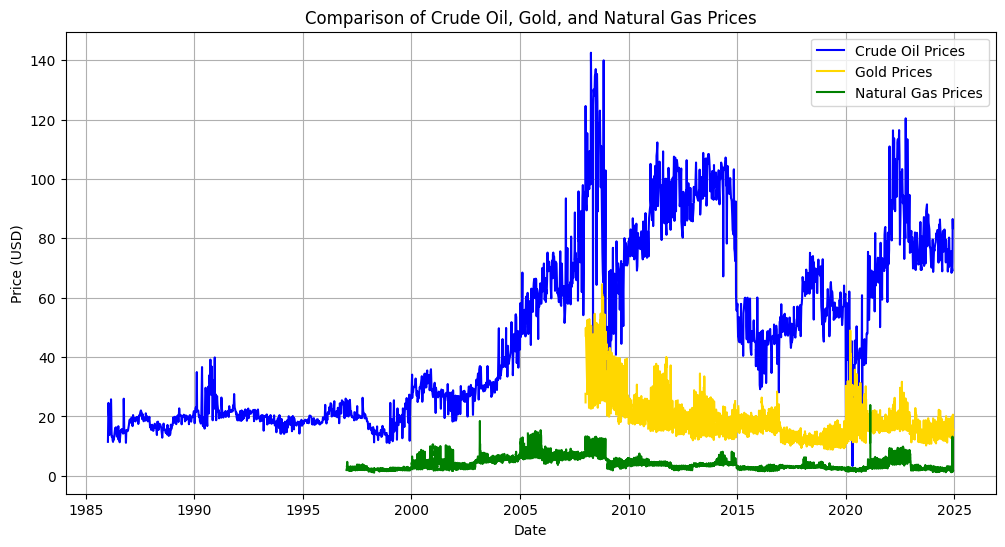

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (replace filenames with your actual file paths)
oil_data = pd.read_csv("C:/Users/alexm/OneDrive/Desktop/Portfolio_Paper/data/Macro_data/oil_prices.csv")
gold_data = pd.read_csv("C:/Users/alexm/OneDrive/Desktop/Portfolio_Paper/data/Macro_data/gold_prices.csv")
gas_data = pd.read_csv("C:/Users/alexm/OneDrive/Desktop/Portfolio_Paper/data/Macro_data/gas_prices.csv")

# Ensure the Date column is in datetime format
oil_data['Date'] = pd.to_datetime(oil_data['Date'])
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gas_data['Date'] = pd.to_datetime(gas_data['Date'])

# Sort data by Date for proper plotting
oil_data = oil_data.sort_values('Date')
gold_data = gold_data.sort_values('Date')
gas_data = gas_data.sort_values('Date')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(oil_data['Date'], oil_data['Price'], label="Crude Oil Prices", color='blue')
plt.plot(gold_data['Date'], gold_data['Price'], label="Gold Prices", color='gold')
plt.plot(gas_data['Date'], gas_data['Price'], label="Natural Gas Prices", color='green')

# Customize the plot
plt.title("Comparison of Crude Oil, Gold, and Natural Gas Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [50]:
oil_data = pd.read_csv("C:/Users/alexm/OneDrive/Desktop/Portfolio_Paper/data/stock_data/all_stocks_5yr.csv")

tickers  = oil_data['Name'].unique()
# Save to CSV
df = pd.DataFrame(tickers, columns=["Ticker"])
df.to_csv("nyse_tickers.csv", index=False)
print("Ticker list saved to nyse_tickers.csv.")


Ticker list saved to nyse_tickers.csv.


In [51]:
!py -3.12 -m pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

stock_pd = pd.read_csv("nyse_tickers.csv")
# Load stock tickers
stock_list = stock_pd.Ticker.to_list()  # Replace with your tickers

# Define date range
start_date = "2010-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

# Define a function to extract stock data
def fetch_stock_data(ticker):
    print(f"Fetching data for {ticker}...")
    stock = yf.Ticker(ticker)
    data = {}
    
    try:
        # Historical price data
        history = stock.history(start=start_date, end=end_date)
        data["Historical Prices"] = history
        
        # Financial ratios (value features)
        financials = stock.financials
        balance_sheet = stock.balance_sheet
        cashflow = stock.cashflow
        
        # Calculate value features
        try:
            pe_ratio = history['Close'].iloc[-1] / (financials.loc["Net Income", :].sum() / stock.info["sharesOutstanding"])
            pb_ratio = history['Close'].iloc[-1] / (balance_sheet.loc["Stockholders Equity", :].sum() / stock.info["sharesOutstanding"])
            ev_ebitda = (stock.info["enterpriseValue"] / financials.loc["EBITDA", :].sum())
            data["Value Features"] = {"P/E Ratio": pe_ratio, "P/B Ratio": pb_ratio, "EV/EBITDA": ev_ebitda}
        except Exception as e:
            print(f"Error calculating value features for {ticker}: {e}")
        
        # Quality features
        data["Quality Features"] = {
            "EPS Growth (5 years)": financials.loc["Diluted EPS", :].pct_change(5).iloc[-1],
            "Positive Net Income": all(financials.loc["Net Income"][-5:] > 0),
            "Return on Equity": financials.loc["Net Income", :].sum() / balance_sheet.loc["Stockholders Equity", :].sum(),
            "Current Ratio": balance_sheet.loc["Current Assets", :].sum() / balance_sheet.loc["Current Liabilities", :].sum(),
        }
        
        # Industry classification
        data["Industry"] = stock.info["sector"]
        
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
    
    return data

# Fetch data for all stocks
stock_data = {}
for ticker in stock_list:
    stock_data[ticker] = fetch_stock_data(ticker)

# Save data to CSV
path = "data/stock_data/"
for ticker, data in stock_data.items():
    if "Historical Prices" in data:
        data["Historical Prices"].to_csv(f"{path}{ticker}_historical_prices.csv")
    if "Value Features" in data:
        pd.DataFrame([data["Value Features"]]).to_csv(f"{path}{ticker}_value_features.csv", index=False)
    if "Quality Features" in data:
        pd.DataFrame([data["Quality Features"]]).to_csv(f"{path}{ticker}_quality_features.csv", index=False)

print("Data extraction complete!")


In [53]:
stock = yf.Ticker("AAPL")
stock.quarterly_balance_sheet

,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Treasury Shares Number,NaN,NaN,NaN,0.0,0.0,NaN,NaN
Ordinary Shares Number,15116786000.0,15222259000.0,15337686000.0,15460223000.0,15550061000.0,NaN,NaN
Share Issued,15116786000.0,15222259000.0,15337686000.0,15460223000.0,15550061000.0,NaN,NaN
Net Debt,76686000000.0,75739000000.0,71895000000.0,67280000000.0,81123000000.0,NaN,NaN
Total Debt,106629000000.0,101304000000.0,104590000000.0,108040000000.0,111088000000.0,NaN,NaN
...,...,...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,65171000000.0,61801000000.0,67150000000.0,73100000000.0,61555000000.0,NaN,NaN
Other Short Term Investments,35228000000.0,36236000000.0,34455000000.0,32340000000.0,31590000000.0,NaN,NaN
Cash And Cash Equivalents,29943000000.0,25565000000.0,32695000000.0,40760000000.0,29965000000.0,NaN,NaN
Cash Equivalents,2744000000.0,2699000000.0,4468000000.0,11218000000.0,1606000000.0,NaN,NaN


In [54]:
# for col,i in stock.quarterly_balance_sheet:
#     print()
    
stock.balance_sheet.loc["Current Assets"]

2024-09-30    152987000000.0
2023-09-30    143566000000.0
2022-09-30    135405000000.0
2021-09-30    134836000000.0
2020-09-30               NaN
Name: Current Assets, dtype: object

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define stock list and time range
stock_pd = pd.read_csv("nyse_tickers.csv")
# Load stock tickers
stock_list = stock_pd.Ticker.to_list()  # Replace with your tickers
start_date = "2010-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")
def fetch_historical_features(ticker):
    print(f"Fetching data for {ticker}...")
    stock = yf.Ticker(ticker)
    historical_data = []
    
    try:
        # Fetch historical financial data
        income_statement = stock.financials.T
        balance_sheet = stock.balance_sheet.T
        cashflow = stock.cashflow.T

        # Normalize financial data index to remove timezone
        income_statement.index = income_statement.index.tz_localize(None)
        balance_sheet.index = balance_sheet.index.tz_localize(None)
        cashflow.index = cashflow.index.tz_localize(None)
        
        # Fetch historical price data
        price_data = stock.history(start=start_date, end=end_date, interval="1mo")
        price_data = price_data.reset_index()[["Date", "Close"]]
        price_data['Date'] = price_data['Date'].dt.tz_localize(None)  # Normalize timezone

        # Align financial data with price data by quarter
        for date in income_statement.index:
            try:
                # Match the closest date in price data
                closest_date = price_data[price_data["Date"] <= date].iloc[-1]["Date"]
                close_price = price_data[price_data["Date"] == closest_date]["Close"].values[0]
                
                # Calculate value features
                pe_ratio = close_price / (income_statement.loc[date, "Net Income"] / stock.info["sharesOutstanding"])
                pb_ratio = close_price / (balance_sheet.loc[date, "Stockholders Equity"] / stock.info["sharesOutstanding"])
                
                # Calculate quality features
                roe = income_statement.loc[date, "Net Income"] / balance_sheet.loc[date, "Stockholders Equity"]
                current_ratio = balance_sheet.loc[date, "Current Assets"] / balance_sheet.loc[date, "Current Liabilities"]
                
                # Store the results
                historical_data.append({
                    "Date": closest_date,
                    "P/E Ratio": pe_ratio,
                    "P/B Ratio": pb_ratio,
                    "ROE": roe,
                    "Current Ratio": current_ratio,
                    "Close Price": close_price
                })
            except Exception as e:
                print(f"Error processing data for {ticker} on {date}: {e}")
        
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
    
    # Convert to DataFrame
    return pd.DataFrame(historical_data)


# Fetch data for all stocks
all_features = []
for ticker in stock_list:
    features = fetch_historical_features(ticker)
    features["Ticker"] = ticker
    all_features.append(features)

# Combine all stock data into a single DataFrame
all_features_df = pd.concat(all_features, ignore_index=True)

# Save to CSV
all_features_df.to_csv("historical_features.csv", index=False)
print("Data extraction complete!")


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define stock list and time range
stock_pd = pd.read_csv("nyse_tickers.csv")
stock_list = stock_pd.Ticker.to_list()  # Replace with your tickers
start_date = "2010-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

def fetch_quarterly_features(ticker):
    print(f"Fetching data for {ticker}...")
    stock = yf.Ticker(ticker)
    historical_data = []
    
    try:
        # Fetch quarterly financial data
        income_statement = stock.quarterly_financials.T
        balance_sheet = stock.quarterly_balance_sheet.T
        cashflow = stock.quarterly_cashflow.T

        # Normalize financial data index to remove timezone
        income_statement.index = income_statement.index.tz_localize(None)
        balance_sheet.index = balance_sheet.index.tz_localize(None)
        cashflow.index = cashflow.index.tz_localize(None)
        
        # Fetch historical price data
        price_data = stock.history(start=start_date, end=end_date, interval="1mo")
        price_data = price_data.reset_index()[["Date", "Close"]]
        price_data['Date'] = price_data['Date'].dt.tz_localize(None)  # Normalize timezone
        print(income_statement.index)
        # Align financial data with price data by quarter
        for date in income_statement.index:
            print(date)
            try:
                # Match the closest date in price data
                closest_date = price_data[price_data["Date"] <= date].iloc[-1]["Date"]
                close_price = price_data[price_data["Date"] == closest_date]["Close"].values[0]
                
                # Calculate value features
                pe_ratio = close_price / (income_statement.loc[date, "Net Income"] / stock.info["sharesOutstanding"])
                pb_ratio = close_price / (balance_sheet.loc[date, "Stockholders Equity"] / stock.info["sharesOutstanding"])
                
                # Calculate EV/EBITDA
                ev = stock.info.get("enterpriseValue", None)
                ebitda = income_statement.loc[date, "EBITDA"] if "EBITDA" in income_statement.columns else None
                ev_ebitda = ev / ebitda if ev and ebitda else None
                
                # Calculate quality features
                roe = income_statement.loc[date, "Net Income"] / balance_sheet.loc[date, "Stockholders Equity"]
                current_ratio = balance_sheet.loc[date, "Current Assets"] / balance_sheet.loc[date, "Current Liabilities"]
                
                # Store the results
                historical_data.append({
                    "Date": closest_date,
                    "P/E Ratio": pe_ratio,
                    "P/B Ratio": pb_ratio,
                    "EV/EBITDA": ev_ebitda,
                    "ROE": roe,
                    "Current Ratio": current_ratio,
                    "Close Price": close_price
                })
            except Exception as e:
                print(f"Error processing data for {ticker} on {date}: {e}")
        
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
    
    # Convert to DataFrame
    return pd.DataFrame(historical_data)

# Fetch data for all stocks
all_features = []
for ticker in stock_list:
    features = fetch_quarterly_features(ticker)
    features["Ticker"] = ticker
    all_features.append(features)

# Combine all stock data into a single DataFrame
all_features_df = pd.concat(all_features, ignore_index=True)

# Save to CSV
all_features_df.to_csv("quarterly_features.csv", index=False)
print("Data extraction complete!")


In [ ]:
tickers = pd.read_csv("nyse_tickers.csv")["Ticker"].to_list()
tickers

In [96]:
import pandas as pd
import glob

# Load historical data
for ticker in tickers:
    historical_file = f"data/stock_data/{ticker}_historical_prices.csv"
    historical_data = pd.read_csv(historical_file, parse_dates=['Date']) 
    historical_data['Date'] = pd.to_datetime(historical_data['Date'], utc=True)
    historical_data['Date'] = historical_data['Date'].dt.tz_localize(None)
    start_date = pd.Timestamp("2023-03-03")
    historical_data = historical_data[(historical_data['Date']) >= start_date]
    print(historical_data.head())
    # Load yearly and quarterly reports
    yearly_report = pd.read_csv("historical_features.csv", parse_dates=['Date'])
    yearly_report = yearly_report[(yearly_report['Ticker'] == ticker)]
    print(yearly_report.head())
    quarterly_report = pd.read_csv("quarterly_features.csv", parse_dates=['Date'])
    quarterly_report = quarterly_report[(quarterly_report['Ticker'] == ticker)]
    print(quarterly_report.head())
    
    break


                    Date       Open       High        Low      Close  \
3313 2023-03-03 05:00:00  16.370001  16.549999  16.139999  16.360001   
3314 2023-03-06 05:00:00  16.469999  16.549999  16.100000  16.120001   
3315 2023-03-07 05:00:00  16.240000  16.660000  16.139999  16.360001   
3316 2023-03-08 05:00:00  16.410000  16.600000  16.270000  16.590000   
3317 2023-03-09 05:00:00  16.549999  16.799999  15.850000  15.880000   

        Volume  Dividends  Stock Splits  
3313  14389500        0.0           0.0  
3314  13504800        0.0           0.0  
3315  17951300        0.0           0.0  
3316  11399600        0.0           0.0  
3317  18505000        0.0           0.0  
        Date  P/E Ratio  P/B Ratio       ROE  Current Ratio  Close Price  \
0 2023-12-01  10.984160  -1.735675 -0.158016       0.615175    13.740000   
1 2022-12-01  65.816587  -1.441405 -0.021900       0.710318    12.720000   
2 2021-12-01  -5.921762  -1.607912  0.271526       0.912133    17.959999   
3 2020-12-0

In [3]:
def find_closest_report(row, report_df):
    # Filter reports before the given date
    # print(report_df['Date'] )
    # report_df['Date'] = report_df['Date'].dt.tz_localize(None)
    # row['Date'] = row['Date'].dt.tz_localize(None)
    # print(row['Date'] , report_df['Date'])
    past_reports = report_df[report_df['Date'] <= row['Date']]
    # print(past_reports)
    if past_reports.empty:
        # print(None)
        return None
    # Get the latest report date
    closest_report = past_reports.loc[past_reports['Date'].idxmax()]
    return closest_report

# Example usage for a single DataFrame
def enrich_with_reports(historical_df, yearly_df, quarterly_df):
    enriched_data = []
    
    for _, row in historical_df.iterrows():
        # Find closest yearly and quarterly reports
        closest_yearly = find_closest_report(row, yearly_df)
        closest_quarterly = find_closest_report(row, quarterly_df)
        
        # Combine data
        enriched_row = row.to_dict()
        if closest_yearly is not None:
            enriched_row.update({f"Yearly_{col}": closest_yearly[col] for col in yearly_df.columns if col != 'Date'})
        if closest_quarterly is not None:
            enriched_row.update({f"Quarterly_{col}": closest_quarterly[col] for col in quarterly_df.columns if col != 'Date'})
        
        enriched_data.append(enriched_row)
    
    return pd.DataFrame(enriched_data)


In [ ]:
enriched_data = []
historical_data = [historical_data]
for stock_data in historical_data:
    enriched_stock_data = enrich_with_reports(stock_data, yearly_report, quarterly_report)
    enriched_data.append(enriched_stock_data)

# Combine all enriched data
final_data = pd.concat(enriched_data, ignore_index=True)


2023-03-03 05:00:00 0   2023-12-01
1   2022-12-01
2   2021-12-01
3   2020-12-01
4   2019-12-01
Name: Date, dtype: datetime64[ns]
        Date  P/E Ratio  P/B Ratio       ROE  Current Ratio  Close Price  \
1 2022-12-01  65.816587  -1.441405 -0.021900       0.710318    12.720000   
2 2021-12-01  -5.921762  -1.607912  0.271526       0.912133    17.959999   
3 2020-12-01  -1.166343  -1.509095  1.293869       0.669624    15.770000   
4 2019-12-01        NaN        NaN       NaN            NaN    28.574404   

  Ticker  
1    AAL  
2    AAL  
3    AAL  
4    AAL  
2023-03-03 05:00:00 0   2024-09-01
1   2024-06-01
2   2024-03-01
3   2023-12-01
4   2023-09-01
Name: Date, dtype: datetime64[ns]
Empty DataFrame
Columns: [Date, P/E Ratio, P/B Ratio, EV/EBITDA, ROE, Current Ratio, Close Price, Ticker]
Index: []
None
2023-03-06 05:00:00 0   2023-12-01
1   2022-12-01
2   2021-12-01
3   2020-12-01
4   2019-12-01
Name: Date, dtype: datetime64[ns]
        Date  P/E Ratio  P/B Ratio       ROE  Current Ra

In [105]:
final_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Yearly_P/E Ratio,Yearly_P/B Ratio,...,Yearly_Current Ratio,Yearly_Close Price,Yearly_Ticker,Quarterly_P/E Ratio,Quarterly_P/B Ratio,Quarterly_EV/EBITDA,Quarterly_ROE,Quarterly_Current Ratio,Quarterly_Close Price,Quarterly_Ticker
450,2024-12-16 05:00:00,16.910000,16.950001,16.459999,16.520000,15741000,0.0,0.0,10.98416,-1.735675,...,0.615175,13.74,AAL,-49.571492,-1.521663,184.44363,0.030696,0.566191,11.24,AAL
451,2024-12-17 05:00:00,16.450001,16.740000,16.219999,16.719999,23622000,0.0,0.0,10.98416,-1.735675,...,0.615175,13.74,AAL,-49.571492,-1.521663,184.44363,0.030696,0.566191,11.24,AAL
452,2024-12-18 05:00:00,16.770000,17.280001,16.260000,16.469999,25019500,0.0,0.0,10.98416,-1.735675,...,0.615175,13.74,AAL,-49.571492,-1.521663,184.44363,0.030696,0.566191,11.24,AAL
453,2024-12-19 05:00:00,16.650000,16.799999,16.480000,16.639999,17832700,0.0,0.0,10.98416,-1.735675,...,0.615175,13.74,AAL,-49.571492,-1.521663,184.44363,0.030696,0.566191,11.24,AAL
454,2024-12-20 05:00:00,16.570000,17.180000,16.530001,16.879999,28634300,0.0,0.0,10.98416,-1.735675,...,0.615175,13.74,AAL,-49.571492,-1.521663,184.44363,0.030696,0.566191,11.24,AAL


In [7]:
import pandas as pd
import glob
enriched_data = []
# Load historical data
for ticker in tickers:
    historical_file = f"data/stock_data/{ticker}_historical_prices.csv"
    historical_data = pd.read_csv(historical_file, parse_dates=['Date']) 
    historical_data['Date'] = pd.to_datetime(historical_data['Date'], utc=True)
    historical_data['Date'] = historical_data['Date'].dt.tz_localize(None)
    start_date = pd.Timestamp("2023-03-03")
    historical_data = historical_data[(historical_data['Date']) >= start_date]
    # print(historical_data.head())
    # Load yearly and quarterly reports
    yearly_report = pd.read_csv("historical_features.csv", parse_dates=['Date'])
    yearly_report = yearly_report[(yearly_report['Ticker'] == ticker)]
    # print(yearly_report.head())
    quarterly_report = pd.read_csv("quarterly_features.csv", parse_dates=['Date'])
    quarterly_report = quarterly_report[(quarterly_report['Ticker'] == ticker)]
    # print(quarterly_report.head())
    enriched_stock_data = enrich_with_reports(historical_data, yearly_report, quarterly_report)
    enriched_data.append(enriched_stock_data)
    


In [8]:
# Combine all enriched data into a single DataFrame
# Assuming `enriched_stock_data` is a DataFrame for each ticker
combined_enriched_data = pd.concat(enriched_data, ignore_index=True)

# Save to CSV
output_file = "enriched_data.csv"
combined_enriched_data.to_csv(output_file, index=False)


In [9]:
final_data = pd.read_csv("enriched_data.csv")
oil_data = pd.read_csv("C:/Users/alexm/OneDrive/Desktop/Portfolio_Paper/data/Macro_data/oil_prices.csv")
gold_data = pd.read_csv("C:/Users/alexm/OneDrive/Desktop/Portfolio_Paper/data/Macro_data/gold_prices.csv")
gas_data = pd.read_csv("C:/Users/alexm/OneDrive/Desktop/Portfolio_Paper/data/Macro_data/gas_prices.csv")